# load Data

In [7]:
import pandas as pd


df = pd.read_csv(r"C:\Users\Computec\Desktop\New folder (2)\data_cleaned.csv")  
df.head()


,age,age_distribution,gender,cholesterol,gluc,smoke,alco,active,height,weight,BMI,BMI_Class,ap_hi,ap_lo,BP_Class,Blood pressure,CVD
0,25,25-29,female,elevated,pre diabetic,no-smoke,non-alco,active,149,54,24.32,Normal weight,177,78,Hypertension Stage 2,normal,non-cvd
1,25,25-29,female,normal,normal,no-smoke,non-alco,active,146,55,25.80,Over weight,149,95,Hypertension Stage 2,normal,non-cvd
2,25,25-29,female,elevated,normal,no-smoke,non-alco,non-active,145,75,35.67,Obese,141,98,Hypertension Stage 2,normal,non-cvd
3,25,25-29,female,normal,normal,no-smoke,alco,non-active,158,79,31.65,Obese,135,95,Hypertension Stage 1,normal,non-cvd
4,25,25-29,female,normal,normal,no-smoke,non-alco,active,178,62,19.57,Normal weight,155,98,Hypertension Stage 2,type 1,non-cvd


# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               300000 non-null  int64  
 1   age_distribution  300000 non-null  object 
 2   gender            300000 non-null  object 
 3   cholesterol       300000 non-null  object 
 4   gluc              300000 non-null  object 
 5   smoke             300000 non-null  object 
 6   alco              300000 non-null  object 
 7   active            300000 non-null  object 
 8   height            300000 non-null  int64  
 9   weight            300000 non-null  int64  
 10  BMI               300000 non-null  float64
 11  BMI_Class         300000 non-null  object 
 12  ap_hi             300000 non-null  int64  
 13  ap_lo             300000 non-null  int64  
 14  BP_Class          300000 non-null  object 
 15  Blood pressure    300000 non-null  object 
 16  CVD               30

In [9]:
df.describe()

,age,height,weight,BMI,ap_hi,ap_lo
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000
mean,52.720307,167.849013,96.466167,34.714817,134.53833,84.489777
std,12.816043,12.119234,37.846784,14.448891,25.94098,14.425929
min,25.000000,145.000000,45.000000,13.290000,90.00000,60.000000
25%,40.000000,158.000000,67.000000,23.670000,112.00000,72.000000
50%,56.000000,168.000000,87.000000,30.850000,135.00000,84.000000
75%,61.000000,177.000000,118.000000,42.940000,157.00000,97.000000
max,84.000000,194.000000,199.000000,88.440000,179.00000,109.000000


In [10]:

print(df.isna().sum())


age                 0
age_distribution    0
gender              0
cholesterol         0
gluc                0
smoke               0
alco                0
active              0
height              0
weight              0
BMI                 0
BMI_Class           0
ap_hi               0
ap_lo               0
BP_Class            0
Blood pressure      0
CVD                 0
dtype: int64


In [11]:
df = df.drop(columns=['id'])

KeyError: "['id'] not found in axis"

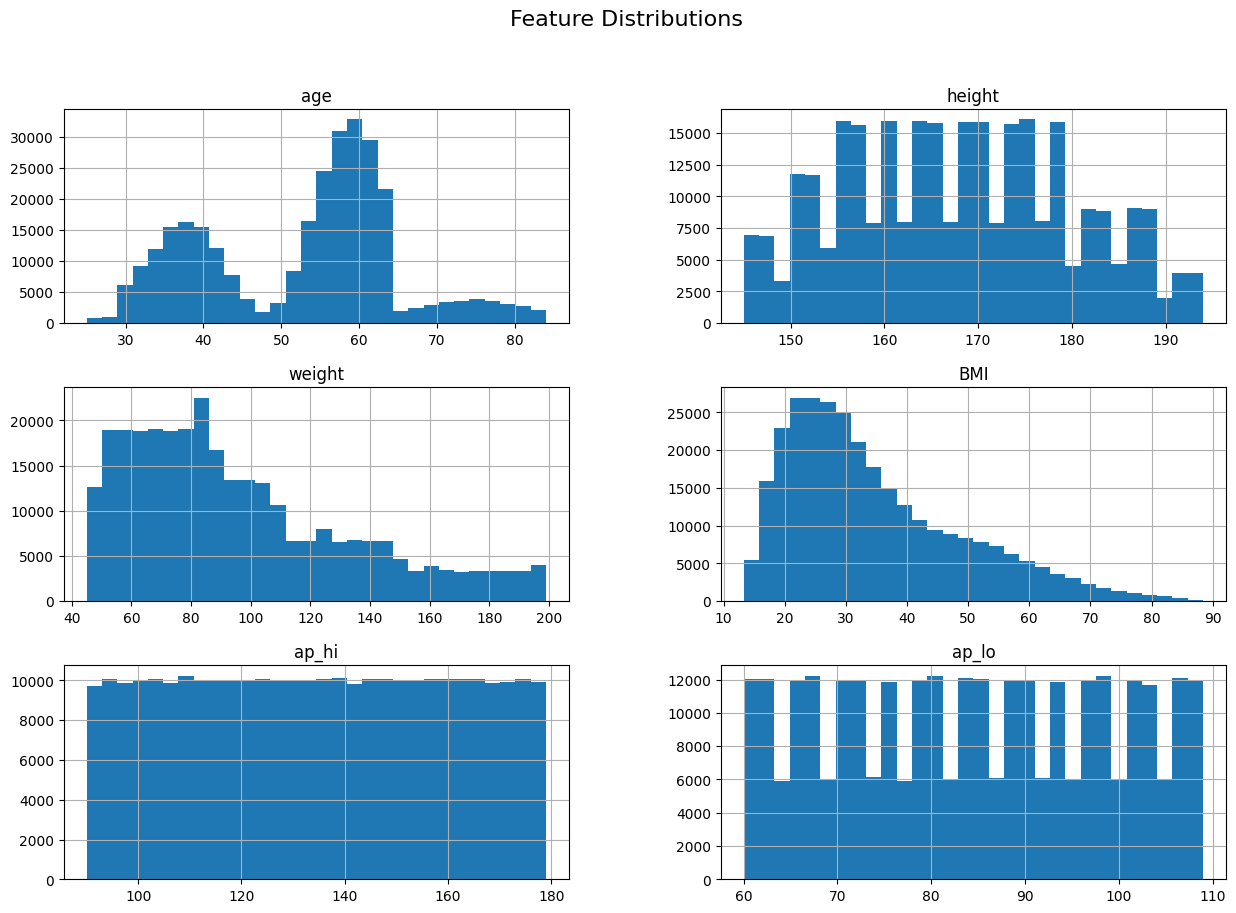

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [ ]:
df['gender'].value_counts(dropna=False)

gender
male      180000
female    120000
Name: count, dtype: int64

In [ ]:
import seaborn as sns
sns.countplot(x='CVD', data=df)
plt.title("Cardiovascular Disease Distribution")
plt.show()


sns.countplot(x='gender', data=df)    
plt.title("Gender Distribution")
plt.show()


NameError: name 'df' is not defined

# Outlier Detection

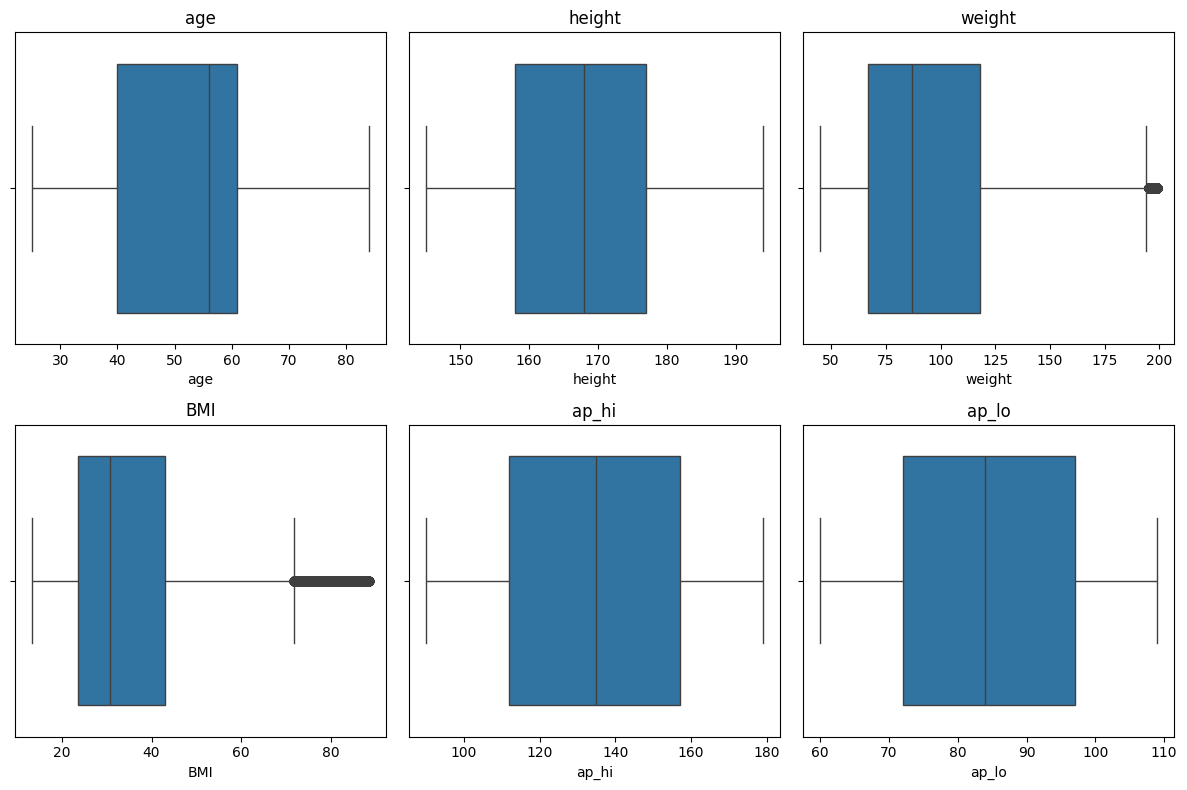

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["age", "height", "weight", "BMI", "ap_hi", "ap_lo"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_iqr(data, col):
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    mask_outliers = (data[col] < lower) | (data[col] > upper)
    num_removed = mask_outliers.sum()
    cleaned = data[mask_outliers].copy()
    
    print(f"{num_removed} outliers removed from column '{col}'.")
    return cleaned, num_removed

In [ ]:
df_clean_age, removed_age = remove_outliers_iqr(df, 'age')
df_clean_weight, removed_weight = remove_outliers_iqr(df, 'weight')
df_clean_bmi, removed_bmi = remove_outliers_iqr(df, 'BMI')

print("Removed counts:", removed_age, removed_weight, removed_bmi)


0 outliers removed from column 'age'.
3379 outliers removed from column 'weight'.
5605 outliers removed from column 'BMI'.
Removed counts: 0 3379 5605


In [ ]:
df.to_csv("heart_data1_cleaned1.csv", index=False)